
## Project: Build a Traffic Sign Recognition Classifier

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "traffic-signs-data/train.p"
validation_file= "traffic-signs-data/valid.p"
testing_file = "traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

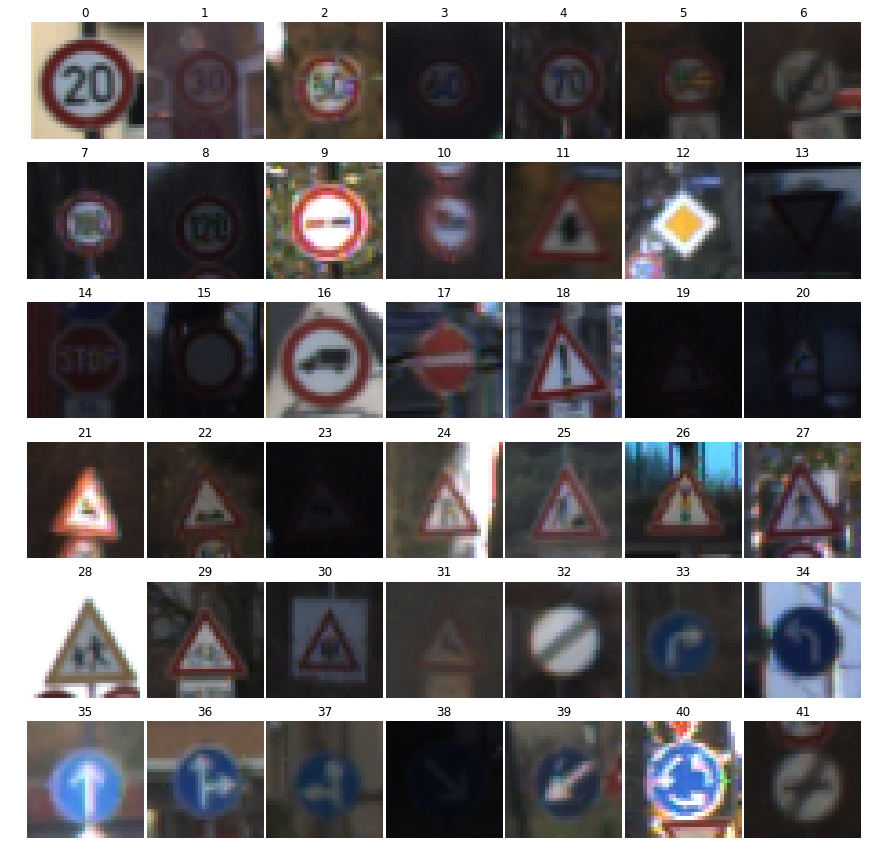

In [10]:
# Visualize training data with their labels
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

fig, axs = plt.subplots(6,7, figsize=(15, 15))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()

image_reference = np.ndarray(shape=(43, 32, 32, 3), dtype=np.uint8)
for class_index in range(43):
    for index in range(y_train.shape[0]):
        if y_train[index] == class_index:
            image_reference[class_index] = X_train[index]
            break

for i in range(6):
    axs[i * 7].axis('off')
    axs[i * 7].imshow(image_reference[i * 7])
    axs[i * 7].set_title(i * 7)
    
    axs[i * 7 + 1].axis('off')
    axs[i * 7 + 1].imshow(image_reference[i * 7 + 1])
    axs[i * 7 + 1].set_title(i * 7 + 1)
    
    axs[i * 7 + 2].axis('off')
    axs[i * 7 + 2].imshow(image_reference[i * 7 + 2])
    axs[i * 7 + 2].set_title(i * 7 + 2)
    
    axs[i * 7 + 3].axis('off')
    axs[i * 7 + 3].imshow(image_reference[i * 7 + 3])
    axs[i * 7 + 3].set_title(i * 7 + 3)
    
    axs[i * 7 + 4].axis('off')
    axs[i * 7 + 4].imshow(image_reference[i * 7 + 4])
    axs[i * 7 + 4].set_title(i * 7 + 4)
    
    axs[i * 7 + 5].axis('off')
    axs[i * 7 + 5].imshow(image_reference[i * 7 + 5])
    axs[i * 7 + 5].set_title(i * 7 + 5)
    
    axs[i * 7 + 6].axis('off')
    axs[i * 7 + 6].imshow(image_reference[i * 7 + 6])
    axs[i * 7 + 6].set_title(i * 7 + 6)
    
plt.show()

In [11]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = [X_train.shape[1], X_train.shape[2]]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = [32, 32]
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

Number of original dataset per class
[180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260, 1320, 1800, 1170, 1890, 1920, 690, 540, 360, 990, 1080, 180, 300, 270, 330, 450, 240, 1350, 540, 210, 480, 240, 390, 690, 210, 599, 360, 1080, 330, 180, 1860, 270, 300, 210, 210]
mean train sample number:  809.2790697674419


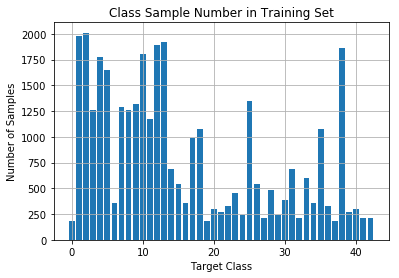

Number of original dataset per class
[30, 240, 240, 150, 210, 210, 60, 150, 150, 150, 210, 150, 210, 240, 90, 90, 60, 120, 120, 30, 60, 60, 60, 60, 30, 150, 60, 30, 60, 30, 60, 90, 30, 90, 60, 120, 60, 30, 210, 30, 60, 30, 30]
mean valid sample number:  102.55813953488372


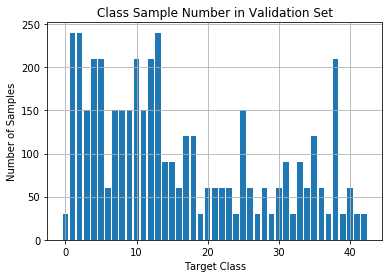

Number of original dataset per class
[60, 720, 750, 450, 660, 630, 150, 450, 450, 480, 660, 420, 690, 720, 270, 210, 150, 360, 390, 60, 90, 90, 120, 150, 90, 480, 180, 60, 150, 90, 150, 270, 60, 210, 120, 390, 120, 60, 690, 90, 90, 60, 90]
mean test sample number:  293.72093023255815


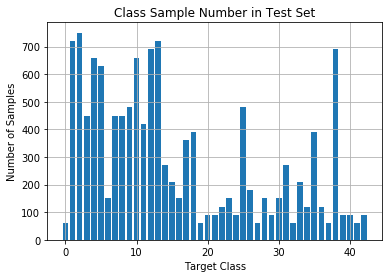

In [12]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import numpy as np

def plot_num_data(X_train, y_train, X_valid, y_valid, X_test, y_test):
    # Plot training set
    sample_num_train_class = [0] * 43
    for i in range(X_train.shape[0]):
        target_class = y_train[i]
        sample_num_train_class[target_class] += 1

    print("Number of original dataset per class")
    print(sample_num_train_class)
    print("mean train sample number: ", np.mean(sample_num_train_class))
    target_class_list = list(range(43))
    plt.xlabel('Target Class')
    plt.ylabel('Number of Samples')
    plt.title('Class Sample Number in Training Set')
    plt.grid(True)
    plt.bar(target_class_list, sample_num_train_class)
    plt.show()

    # Plot validation set
    sample_num_valid_class = [0] * 43
    for i in range(X_valid.shape[0]):
        target_class = y_valid[i]
        sample_num_valid_class[target_class] += 1
    
    print("Number of original dataset per class")
    print(sample_num_valid_class)
    print("mean valid sample number: ", np.mean(sample_num_valid_class))
    target_class_list = list(range(43))
    plt.xlabel('Target Class')
    plt.ylabel('Number of Samples')
    plt.title('Class Sample Number in Validation Set')
    plt.grid(True)
    plt.bar(target_class_list, sample_num_valid_class)
    plt.show()

    # Plot test set
    sample_num_test_class = [0] * 43
    for i in range(X_test.shape[0]):
        target_class = y_test[i]
        sample_num_test_class[target_class] += 1

    print("Number of original dataset per class")
    print(sample_num_test_class)
    print("mean test sample number: ", np.mean(sample_num_test_class))
    target_class_list = list(range(43))
    plt.xlabel('Target Class')
    plt.ylabel('Number of Samples')
    plt.title('Class Sample Number in Test Set')
    plt.grid(True)
    plt.bar(target_class_list, sample_num_test_class)
    plt.show()
    
plot_num_data(X_train, y_train, X_valid, y_valid, X_test, y_test)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [13]:
# Preprocess and augmenting data
import cv2
import numpy as np
import random
import scipy
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from scipy.ndimage import zoom
import random
import warnings
warnings.filterwarnings('ignore', '.*output shape of zoom.*')

def grey_scale_batch(X_train):
    # take only 1 channel from X_train because greyscaled images only has one channel
    grey_X_train = X_train[:,:,:,1]
    
    # double check shape of receiving container is (34799, 32, 32) ?
    # print(grey_X_train.shape)
    for i in range(X_train.shape[0]):
        grey_X_train[i, :, :] = cv2.cvtColor(X_train[i, :, :, :], cv2.COLOR_RGB2GRAY)
    return grey_X_train

def normalization(grey_X_train):
    # must specify the data type as float, otherwise it will inherite data type as int and cause the container to be int
    norm_X_train = grey_X_train[:,:,:].astype(float)
    scaler = MinMaxScaler(feature_range=(-1, 1))
    for i in range(grey_X_train.shape[0]):
        norm_X_train[i,:,:] = (grey_X_train[i,:,:].astype(float) - 128)/128
    return norm_X_train

def standardization(norm_X_train):
    stand_X_train = norm_X_train[:,:,:].astype(float)
    for i in range(stand_X_train.shape[0]):
        scaler = StandardScaler().fit(norm_X_train[i,:,:].astype(float))
        rescaled_image = scaler.transform(norm_X_train[i,:,:].astype(float))
        stand_X_train[i,:,:] = rescaled_image
    return stand_X_train

def rotate90(gray_image):
    return np.rot90(gray_image)


def flip_lr(gray_image):
    return np.fliplr(gray_image)


def flip_ud(gray_image):
    return np.flipud(gray_image)


def clipped_zoom(img, zoom_factor, **kwargs):
    h, w = img.shape[:2]

    # For multichannel images we don't want to apply the zoom factor to the RGB
    # dimension, so instead we create a tuple of zoom factors, one per array
    # dimension, with 1's for any trailing dimensions after the width and height.
    zoom_tuple = (zoom_factor,) * 2 + (1,) * (img.ndim - 2)

    # Zooming out
    if zoom_factor < 1:

        # Bounding box of the zoomed-out image within the output array
        zh = int(h / zoom_factor)
        zw = int(w / zoom_factor)
        top = (h - zh) // 2
        left = (w - zw) // 2

        # Zero-padding
        out = np.zeros_like(img)
        out[top:top + zh, left:left + zw] = zoom(img, zoom_tuple, **kwargs)

    # Zooming in
    elif zoom_factor > 1:

        # Bounding box of the zoomed-in region within the input array
        zh = int(h / zoom_factor)
        zw = int(w / zoom_factor)
        top = (h - zh) // 2
        left = (w - zw) // 2

        out = zoom(img[top:top + zh, left:left + zw], zoom_tuple, **kwargs)

        # `out` might still be slightly larger than `img` due to rounding, so
        # trim off any extra pixels at the edges
        trim_top = ((out.shape[0] - h) // 2)
        trim_left = ((out.shape[1] - w) // 2)
        out = out[trim_top:trim_top + h, trim_left:trim_left + w]

    # If zoom_factor == 1, just return the input array
    else:
        out = img
    return out

def recreate_data(X_train, y_train, N_test):
    train_sample_number = [0] * 43

    # gray scale
    gray_X_train = grey_scale_batch(X_train)  # grey_X_train is (34799, 32, 32)
    # normalization
    norm_X_train = normalization(gray_X_train)
    # standardize image
    stand_X_train = standardization(norm_X_train)

    # Cut the samples from classes with more than N_test images
    X_train_recreate = np.ndarray(shape=(N_test * 43 + 10380, 32, 32), dtype=float)
    y_train_recreate = np.ndarray(shape=(N_test * 43 + 10380), dtype=int)
    print(X_train_recreate.shape)
    index_in_train_recreate = -1
    for i in range(stand_X_train.shape[0]):
        current_class = y_train[i]
        if train_sample_number[current_class] < N_test * 10:
            train_sample_number[current_class] += 1
            index_in_train_recreate += 1
            X_train_recreate[index_in_train_recreate] = stand_X_train[i]
            y_train_recreate[index_in_train_recreate] = current_class

    print(train_sample_number)
    # create fake data for classes with less then 900 images
    for i in range(len(train_sample_number)):
        if train_sample_number[i] < N_test:
            # create fake images on "class i" images
            current_class_image_occurance_index = np.where(y_train_recreate == i)[0]
            current_num_image = train_sample_number[i]
            #         print(len(current_class_image_occurance_index))
            while (current_num_image < N_test):
                current_image = X_train_recreate[random.choice(current_class_image_occurance_index)]
                #             rotate_image = rotate90(current_image)
                flip_left_right = flip_lr(current_image)
                flip_up_down = flip_ud(current_image)
                zoom_image = clipped_zoom(current_image, 1.5)

                # index_in_train_recreate += 1
                # if index_in_train_recreate >= N_test * 43:
                #   break
                # else:
                #   X_train_recreate[index_in_train_recreate] = rotate_image
                #   y_train_recreate[index_in_train_recreate] = i

                index_in_train_recreate += 1
                if index_in_train_recreate >= N_test * 43 + 10380:
                    break
                else:
                    X_train_recreate[index_in_train_recreate] = flip_left_right
                    y_train_recreate[index_in_train_recreate] = i
                    current_num_image += 1

                index_in_train_recreate += 1
                if index_in_train_recreate >= N_test * 43 + 10380:
                    break
                else:
                    X_train_recreate[index_in_train_recreate] = flip_up_down
                    y_train_recreate[index_in_train_recreate] = i
                    current_num_image += 1

                index_in_train_recreate += 1
                if index_in_train_recreate >= N_test * 43 + 10380:
                    break
                else:
                    X_train_recreate[index_in_train_recreate] = zoom_image
                    y_train_recreate[index_in_train_recreate] = i
                    current_num_image += 1

            train_sample_number[i] = current_num_image
    print(train_sample_number)
    return X_train_recreate, y_train_recreate, stand_X_train

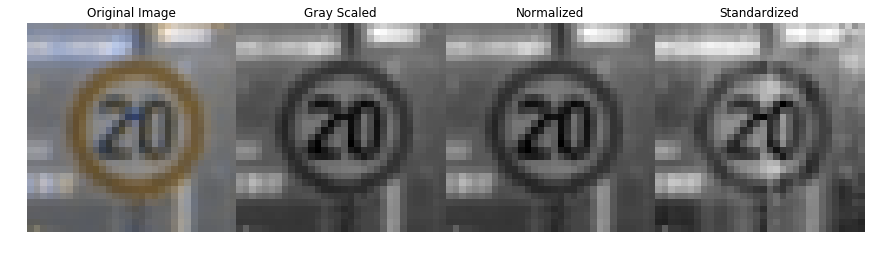

In [21]:
# Visualize data augmentation effects
preview_image = X_train[10000]
preview_image = np.reshape(preview_image, (1, 32, 32, 3))
gray_preview_image = grey_scale_batch(preview_image)
norm_preview_image = normalization(gray_preview_image)
stand_preview_image = standardization(norm_preview_image)

fig, axs = plt.subplots(1,4, figsize=(15, 15))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()

axs[0].axis('off')
axs[0].imshow(preview_image[0])
axs[0].set_title("Original Image")

axs[1].axis('off')
axs[1].imshow(gray_preview_image[0], cmap='gray')
axs[1].set_title("Gray Scaled")

axs[2].axis('off')
axs[2].imshow(norm_preview_image[0], cmap='gray')
axs[2].set_title("Normalized")

axs[3].axis('off')
axs[3].imshow(stand_preview_image[0], cmap='gray')
axs[3].set_title("Standardized")

plt.show()

Generating Training Data
(49080, 32, 32)
[180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260, 1320, 1800, 1170, 1890, 1920, 690, 540, 360, 990, 1080, 180, 300, 270, 330, 450, 240, 1350, 540, 210, 480, 240, 390, 690, 210, 599, 360, 1080, 330, 180, 1860, 270, 300, 210, 210]
[900, 1980, 2010, 1260, 1770, 1650, 900, 1290, 1260, 1320, 1800, 1170, 1890, 1920, 900, 900, 900, 990, 1080, 900, 900, 900, 900, 900, 900, 1350, 900, 900, 900, 900, 900, 900, 900, 902, 900, 1080, 900, 900, 1860, 900, 900, 900, 898]
Number of original dataset per class
[900, 1980, 2010, 1260, 1770, 1650, 900, 1290, 1260, 1320, 1800, 1170, 1890, 1920, 900, 900, 900, 990, 1080, 900, 900, 900, 900, 900, 900, 1350, 900, 900, 900, 900, 900, 900, 900, 902, 900, 1080, 900, 900, 1860, 900, 900, 900, 898]
mean train sample number:  1141.3953488372092


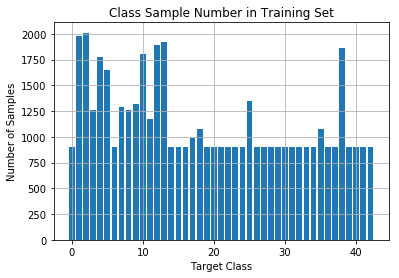

Number of original dataset per class
[30, 240, 240, 150, 210, 210, 60, 150, 150, 150, 210, 150, 210, 240, 90, 90, 60, 120, 120, 30, 60, 60, 60, 60, 30, 150, 60, 30, 60, 30, 60, 90, 30, 90, 60, 120, 60, 30, 210, 30, 60, 30, 30]
mean valid sample number:  102.55813953488372


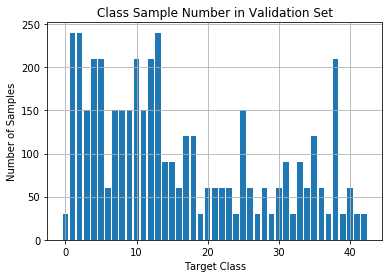

Number of original dataset per class
[60, 720, 750, 450, 660, 630, 150, 450, 450, 480, 660, 420, 690, 720, 270, 210, 150, 360, 390, 60, 90, 90, 120, 150, 90, 480, 180, 60, 150, 90, 150, 270, 60, 210, 120, 390, 120, 60, 690, 90, 90, 60, 90]
mean test sample number:  293.72093023255815


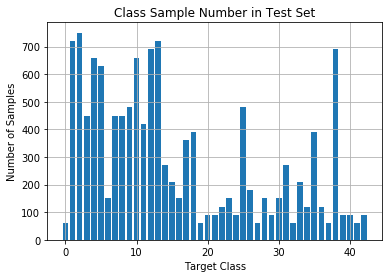

In [5]:
''' Create more training samples because if one class has 20 times more examples of the other, 
    most of the training procedure will be spent on minimising the classification error on the 
    most numerous class. ''' 

print("Generating Training Data")
# Train
X_train_recreate, y_train_recreate, gray_X_train = recreate_data(X_train, y_train, 900)
# Valid
gray_X_valid = grey_scale_batch(X_valid)  # grey_X_train is (34799, 32, 32)
norm_X_valid = normalization(gray_X_valid)
stand_X_valid = standardization(norm_X_valid)
X_valid_recreate = stand_X_valid
y_valid_recreate = y_valid
# Test
gray_X_test = grey_scale_batch(X_test)  # grey_X_train is (34799, 32, 32)
norm_X_test = normalization(gray_X_test)
stand_X_test = standardization(norm_X_test)
X_test_recreate = stand_X_test
y_test_recreate = y_test

plot_num_data(X_train_recreate, y_train_recreate, X_valid_recreate, y_valid_recreate, X_test_recreate, y_test_recreate)


### Model Architecture

In [6]:
from tensorflow.contrib.layers import flatten
import tensorflow as tf
from sklearn.utils import shuffle

def LeNet(x):
    # Hyperparameters
    mu = 0
    sigma = 0.1

    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x8.
    ''' output width = (input width - filter width + 1)/ stride '''
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 8), mean=mu, stddev=sigma))
    tf.add_to_collection(tf.GraphKeys.REGULARIZATION_LOSSES, conv1_W)
    conv1_b = tf.Variable(tf.zeros(8))
    conv1 = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID', name='conv1') + conv1_b

    # Activation.
    conv1 = tf.nn.relu(conv1)

    # Pooling. Input = 28x28x8. Output = 14x14x8.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID', name='conv1_max')

    # Layer 2: Convolutional. Input = 14x14x8, Output = 10x10x16
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 8, 16), mean=mu, stddev=sigma))
    tf.add_to_collection(tf.GraphKeys.REGULARIZATION_LOSSES, conv2_W)
    conv2_b = tf.Variable(tf.zeros(16))
    conv2 = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID', name='conv2') + conv2_b

    # Activation
    conv2 = tf.nn.relu(conv2)
    
    # Pooling. Input = 10x10x16. Output = 5x5x16
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID', name='conv2_max')
    
    # Layer 3: Convolutional. Input = 5x5x16 Output = 2x2x300
    conv3_W = tf.Variable(tf.truncated_normal(shape=(4, 4, 16, 300), mean=mu, stddev=sigma))
    tf.add_to_collection(tf.GraphKeys.REGULARIZATION_LOSSES, conv3_W)
    conv3_b = tf.Variable(tf.zeros(300))
    conv3 = tf.nn.conv2d(conv2, conv3_W, strides=[1, 1, 1, 1], padding='VALID', name='conv3') + conv3_b

    # Activation.
    conv3 = tf.nn.relu(conv3)

    # Dropout
    conv3 = tf.nn.dropout(conv3, keep_prob)

    # Pooling. Input = 2x2x300. Output = 1x1x300.
    conv3 = tf.nn.max_pool(conv3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID', name='conv3_max')

    # Flatten. Input = 1x1x300. Output = 300.
    fc0 = flatten(conv3)
    
    # Flatten conv2. Output = 5x5x16 = 400.
    conv2_layer = flatten(conv2)
    
    # Layer concatenation. Output = 700.
    fc0 = tf.concat([fc0, conv2_layer], 1)

    # Dropout
    fc0 = tf.nn.dropout(fc0, keep_prob)
    
    # Layer 3: Fully Connected. Input = 700. Output = 400.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(700, 400), mean=mu, stddev=sigma))
    tf.add_to_collection(tf.GraphKeys.REGULARIZATION_LOSSES, fc1_W)
    fc1_b = tf.Variable(tf.zeros(400))
    ''' fc0 [1, 700], fc1_W [700, 400] output fc1 [1, 400] '''
    fc1 = tf.matmul(fc0, fc1_W) + fc1_b

    # Activation.
    fc1 = tf.nn.relu(fc1)

    # Layer 4: Fully Connected. Input = 400. Output = 200.
    fc2_W = tf.Variable(tf.truncated_normal(shape=(400, 200), mean=mu, stddev=sigma))
    tf.add_to_collection(tf.GraphKeys.REGULARIZATION_LOSSES, fc2_W)
    fc2_b = tf.Variable(tf.zeros(200))
    ''' [1, 400] * [400, 200] = [1, 200] '''
    fc2 = tf.matmul(fc1, fc2_W) + fc2_b

    # Activation.
    fc2 = tf.nn.relu(fc2)

    fc25_W = tf.Variable(tf.truncated_normal(shape=(200, 84), mean=mu, stddev=sigma))
    tf.add_to_collection(tf.GraphKeys.REGULARIZATION_LOSSES, fc25_W)
    fc25_b = tf.Variable(tf.zeros(84))
    fc25 = tf.matmul(fc2, fc25_W) + fc25_b

    # Activation
    fc25 = tf.nn.relu(fc25)

    # Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W = tf.Variable(tf.truncated_normal(shape=(84, 43), mean=mu, stddev=sigma))
    tf.add_to_collection(tf.GraphKeys.REGULARIZATION_LOSSES, fc3_W)
    fc3_b = tf.Variable(tf.zeros(43))
    ''' [1, 84] * [84, 43] = [1, 43] '''
    logits = tf.matmul(fc25, fc3_W) + fc3_b

    return logits

/home/zac/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [7]:
def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset + BATCH_SIZE], y_data[offset:offset + BATCH_SIZE]
        # Keep all weights during evaluation, dropout keeps all (1.0)
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        prediction = sess.run(prediction_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

def evaluate_print_prediction(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset + BATCH_SIZE], y_data[offset:offset + BATCH_SIZE]
        # Keep all weights during evaluation, dropout keeps all (1.0)
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        prediction = sess.run(prediction_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        print("Prediction Result")
        print(prediction)
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples


In [8]:
# Calculate and report the accuracy on the training and validation set.
__weightRegularize__ = False
EPOCHS = 30
BATCH_SIZE = 100
keep_prob = tf.placeholder(tf.float32)

# Prepare input data
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

# Model completion
rate = 0.0009

regularizer = tf.contrib.layers.l2_regularizer(scale=0.1)
logits = LeNet(x)

if __weightRegularize__:
    reg_variables = tf.get_collection(tf.GraphKeys.REGULARIZATION_LOSSES)
    reg_term = tf.contrib.layers.apply_regularization(regularizer, reg_variables)
    cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
    cross_entropy += reg_term
else:
    cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)

loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate=rate)
training_operation = optimizer.minimize(loss_operation)
# Finish training process

# Precision analysis part
prediction_operation = tf.argmax(logits, 1)
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

X_train_recreate = np.reshape(X_train_recreate, (X_train_recreate.shape[0], X_train_recreate.shape[1], X_train_recreate.shape[2], 1))
X_valid_recreate = np.reshape(X_valid_recreate, (X_valid_recreate.shape[0], X_valid_recreate.shape[1], X_valid_recreate.shape[2], 1))
X_test_recreate = np.reshape(X_test_recreate, (X_test_recreate.shape[0], X_test_recreate.shape[1], X_test_recreate.shape[2], 1))



In [9]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train_recreate)

    print("Training...")
    for i in range(EPOCHS):
        X_train_recreate, y_train_recreate = shuffle(X_train_recreate, y_train_recreate)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_recreate[offset:end], y_train_recreate[offset:end]

            # print(sess.run(bla, feed_dict={y : batch_y}))

            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})

        validation_accuracy = evaluate(X_valid_recreate, y_valid_recreate)
        print("EPOCH {} ...".format(i + 1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()

    saver.save(sess, './traffic_sign_classifier.ckpt')
    print("Model saved")

Training...
EPOCH 1 ...
Validation Accuracy = 0.798

EPOCH 2 ...
Validation Accuracy = 0.888

EPOCH 3 ...
Validation Accuracy = 0.913

EPOCH 4 ...
Validation Accuracy = 0.929

EPOCH 5 ...
Validation Accuracy = 0.931

EPOCH 6 ...
Validation Accuracy = 0.933

EPOCH 7 ...
Validation Accuracy = 0.940

EPOCH 8 ...
Validation Accuracy = 0.952

EPOCH 9 ...
Validation Accuracy = 0.945

EPOCH 10 ...
Validation Accuracy = 0.949

EPOCH 11 ...
Validation Accuracy = 0.951

EPOCH 12 ...
Validation Accuracy = 0.950

EPOCH 13 ...
Validation Accuracy = 0.944

EPOCH 14 ...
Validation Accuracy = 0.952

EPOCH 15 ...
Validation Accuracy = 0.947

EPOCH 16 ...
Validation Accuracy = 0.952

EPOCH 17 ...
Validation Accuracy = 0.952

EPOCH 18 ...
Validation Accuracy = 0.947

EPOCH 19 ...
Validation Accuracy = 0.950

EPOCH 20 ...
Validation Accuracy = 0.947

EPOCH 21 ...
Validation Accuracy = 0.950

EPOCH 22 ...
Validation Accuracy = 0.954

EPOCH 23 ...
Validation Accuracy = 0.954

EPOCH 24 ...
Validation Accurac

In [10]:
# Test training result on test set
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver = tf.train.import_meta_graph('./traffic_sign_classifier.ckpt.meta')
    saver.restore(sess, "./traffic_sign_classifier.ckpt")
    test_accuracy = evaluate(X_test_recreate, y_test_recreate)
    print("Test Set Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./traffic_sign_classifier.ckpt
Test Set Accuracy = 0.931


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

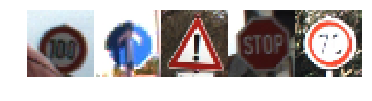

In [11]:
# Load the images
import tensorflow as tf
import cv2
import numpy as np
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

fig, axs = plt.subplots(1,5)
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()

new_test_images = []

for i, img in enumerate(glob.glob('new-test-data/*.jpg')):
    image = cv2.imread(img)
    image = cv2.resize(image, (32, 32)) 
    axs[i].axis('off')
    axs[i].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    new_test_images.append(image)
plt.show()

new_test_array = np.asarray(new_test_images)


### Predict the Sign Type for Each Image

In [12]:
# Run the predictions and use the model to output the prediction for each image.
# Process image data
# gray scale
gray_new_test_array = grey_scale_batch(new_test_array)  # grey_X_train is (34799, 32, 32)
# normalization
norm_new_test_array = normalization(gray_new_test_array)
# standardize image
stand_new_test_array = standardization(norm_new_test_array)
stand_new_test_array = np.reshape(stand_new_test_array, (stand_new_test_array.shape[0], stand_new_test_array.shape[1], stand_new_test_array.shape[2], 1))
y_new_test_array = [7, 35, 18, 14, 4]

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver = tf.train.import_meta_graph('./traffic_sign_classifier.ckpt.meta')
    saver.restore(sess, "./traffic_sign_classifier.ckpt")
    test_accuracy = evaluate_print_prediction(stand_new_test_array, y_new_test_array)
    print("New Test Set Accuracy = {:.3f}".format(test_accuracy))



INFO:tensorflow:Restoring parameters from ./traffic_sign_classifier.ckpt
Prediction Result
[10 35 18 14  4]
New Test Set Accuracy = 0.800


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [13]:
# Read in csv
import csv
import math

index_name_pair = []
with open("signnames.csv") as f:
    records = csv.DictReader(f)
    for row in records:
#         print(row)
        index_name_pair.append(row)
        
# Example of getting the class 0 label
print(index_name_pair[0]['SignName'])

Speed limit (20km/h)


INFO:tensorflow:Restoring parameters from ./traffic_sign_classifier.ckpt


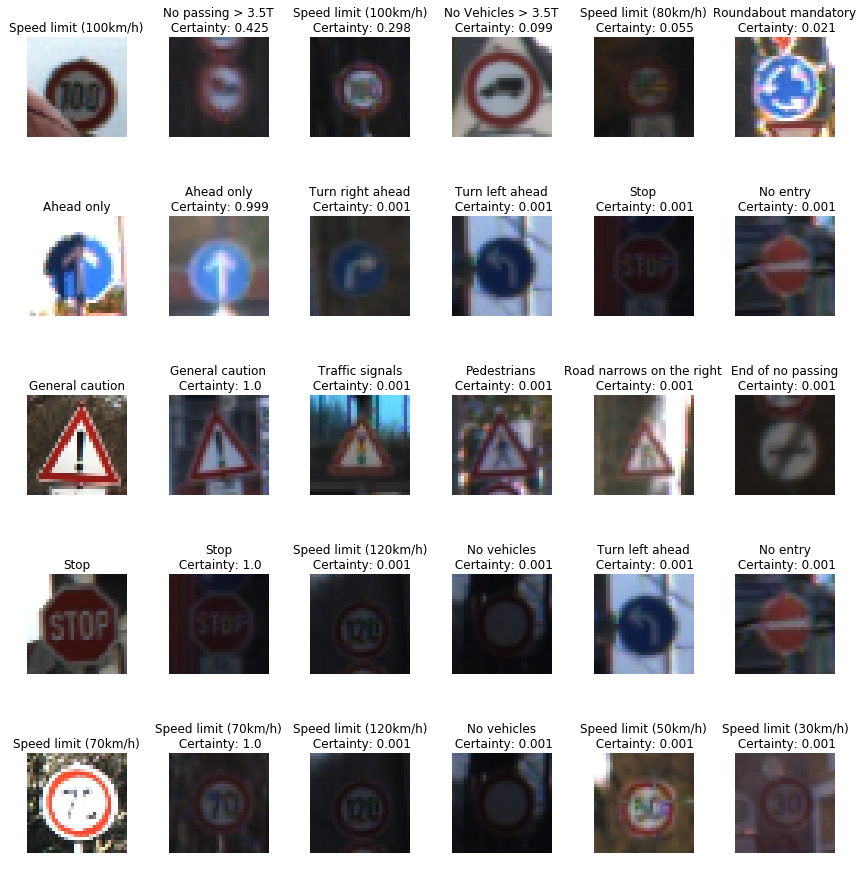

In [14]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
softmax_logits = tf.nn.softmax(logits)
top_k_value, top_k_indices = tf.nn.top_k(softmax_logits, k=5)
top_k_certainty = top_k_value
top_k_class = top_k_indices

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver = tf.train.import_meta_graph('./traffic_sign_classifier.ckpt.meta')
    saver.restore(sess, "./traffic_sign_classifier.ckpt")
    softmax_certainty_of_prediction = sess.run(softmax_logits, feed_dict={x: stand_new_test_array, y: y_new_test_array, keep_prob: 1.0})
    certainty = sess.run(top_k_certainty, feed_dict={x: stand_new_test_array, y: y_new_test_array, keep_prob: 1.0})
    predicted_class = sess.run(top_k_class, feed_dict={x: stand_new_test_array, y: y_new_test_array, keep_prob: 1.0})

# Report result
fig, axs = plt.subplots(5, 6, figsize=(15, 15))
fig.subplots_adjust(hspace = .8, wspace=0.1)
axs = axs.ravel()

# Truth
y_new_test_array = [7, 35, 18, 14, 4]

# Extract 1 image of each class as reference
training_file = "traffic-signs-data/train.p"
with open(training_file, mode='rb') as f:
    train = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
image_reference = np.ndarray(shape=(43, 32, 32, 3), dtype=np.uint8)
for class_index in range(43):
    for index in range(y_train.shape[0]):
        if y_train[index] == class_index:
            image_reference[class_index] = X_train[index]
            break
            
for i, img in enumerate(glob.glob('new-test-data/*.jpg')):
    image = cv2.imread(img)
    image = cv2.resize(image, (32, 32)) 
    axs[i * 6].axis('off')
    axs[i * 6].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    target_label = y_new_test_array[i]
    # target class name
    target_class_name = index_name_pair[target_label]['SignName']
    axs[i * 6].set_title(target_class_name)
    
    # 1st prediction
    prediction_class_name = index_name_pair[predicted_class[i][0]]['SignName']
    prediction_1_result = str(prediction_class_name) + '\n' + " Certainty: " + str(math.ceil(certainty[i][0] * 1000.0) / 1000.0)
    reference_image = image_reference[predicted_class[i][0]]
    axs[i * 6 + 1].axis('off')
    axs[i * 6 + 1].imshow(reference_image)
    axs[i * 6 + 1].set_title(prediction_1_result)
    
    # 2nd prediction
    prediction_class_name = index_name_pair[predicted_class[i][1]]['SignName']
    prediction_2_result = str(prediction_class_name) + '\n' + " Certainty: " + str(math.ceil(certainty[i][1] * 1000.0) / 1000.0)
    reference_image = image_reference[predicted_class[i][1]]
    axs[i * 6 + 2].axis('off')
    axs[i * 6 + 2].imshow(reference_image)
    axs[i * 6 + 2].set_title(prediction_2_result)
    
    # 3rd prediction
    prediction_class_name = index_name_pair[predicted_class[i][2]]['SignName']
    prediction_3_result = str(prediction_class_name) + '\n' + " Certainty: " + str(math.ceil(certainty[i][2] * 1000.0) / 1000.0)
    reference_image = image_reference[predicted_class[i][2]]
    axs[i * 6 + 3].axis('off')
    axs[i * 6 + 3].imshow(reference_image)
    axs[i * 6 + 3].set_title(prediction_3_result)
    
    # 4th prediction
    prediction_class_name = index_name_pair[predicted_class[i][3]]['SignName']
    prediction_4_result = str(prediction_class_name) + '\n' + " Certainty: " + str(math.ceil(certainty[i][3] * 1000.0) / 1000.0)
    reference_image = image_reference[predicted_class[i][3]]
    axs[i * 6 + 4].axis('off')
    axs[i * 6 + 4].imshow(reference_image)
    axs[i * 6 + 4].set_title(prediction_4_result)
    
    # 5th prediction
    prediction_class_name = index_name_pair[predicted_class[i][4]]['SignName']
    prediction_5_result = str(prediction_class_name) + '\n' + " Certainty: " + str(math.ceil(certainty[i][4] * 1000.0) / 1000.0)
    reference_image = image_reference[predicted_class[i][4]]
    axs[i * 6 + 5].axis('off')
    axs[i * 6 + 5].imshow(reference_image)
    axs[i * 6 + 5].set_title(prediction_5_result)

plt.show()

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


Test Image for extracting feature map


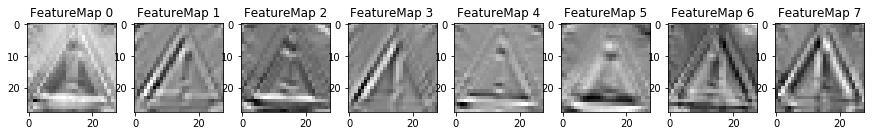

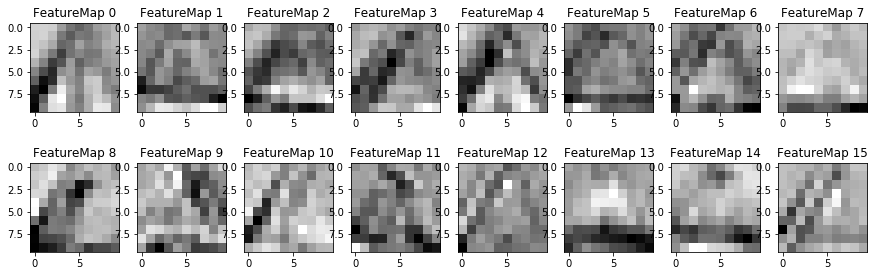

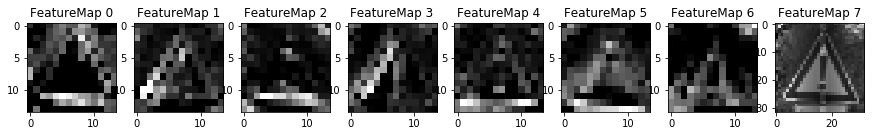

INFO:tensorflow:Restoring parameters from ./traffic_sign_classifier.ckpt


In [20]:
# Visualize your network's feature maps .

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")
            
test_images = []
for i, img in enumerate(glob.glob('new-test-data/*.jpg')):
    image = cv2.imread(img)
    image = cv2.resize(image, (32, 32)) 
    test_images.append(image)

test_images_array = np.asarray(test_images)

gray_test_images = grey_scale_batch(test_images_array)  # grey_X_train is (34799, 32, 32)
# normalization
norm_test_images = normalization(gray_test_images)
# standardize image
stand_test_images = standardization(norm_test_images)
image_used = stand_test_images[2]
print("Test Image for extracting feature map")
plt.imshow(image_used, cmap="gray")
plt.show()

# Reshape image from 32x32 -> 1x32x32x1
image_used = np.reshape(image_used, (1, image_used.shape[0], image_used.shape[1], 1))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, "./traffic_sign_classifier.ckpt")
    # Tensorflow adds :0 to every name
    conv1 = sess.graph.get_tensor_by_name('conv1:0')
    outputFeatureMap(image_used,conv1, activation_min=-1, activation_max=-1, plt_num=1)
    conv2 = sess.graph.get_tensor_by_name('conv2:0')
    outputFeatureMap(image_used,conv2, activation_min=-1, activation_max=-1, plt_num=2)
    conv1_max = sess.graph.get_tensor_by_name('conv1_max:0')
    outputFeatureMap(image_used,conv1_max, activation_min=-1, activation_max=-1, plt_num=3)
    conv2_max = sess.graph.get_tensor_by_name('conv2_max:0')
    outputFeatureMap(image_used,conv2_max, activation_min=-1, activation_max=-1, plt_num=3)